100%|██████████| 39/39 [01:26<00:00,  2.21s/it]


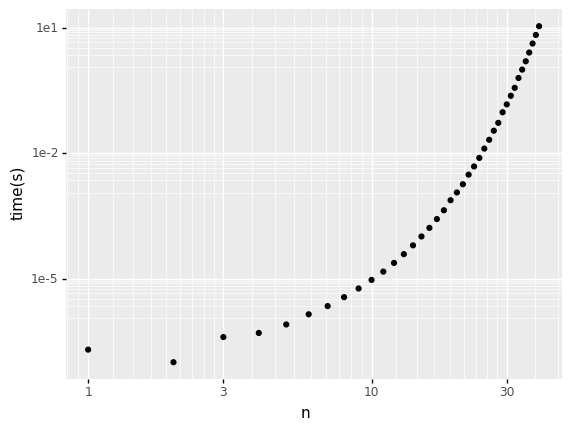

<ggplot: (83706020133)>

In [17]:
import time
import plotnine as p9
import pandas as pd
from tqdm import tqdm

# create the fibonacci sequence 
def r(n):
    if n in (1,2):
       return 1
    else:
        return r(n-1) + r(n-2)

# create the timing function
def time_it(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.perf_counter()
        function(*args)
        times.append(time.perf_counter()-start)
    return min(times)

# run range of n from 1 to 40
ns = range(1,40)
times = [time_it(r,n)for n in tqdm(ns)]

# plot the runtime of function r(n)
(    
    p9.ggplot(pd.DataFrame({'n':ns, 'time(s)':times}), 
    p9.aes(x = "n", y = "time(s)")) +
    p9.geom_point()+
    p9.scale_x_log10(trans = 'log10')+
    p9.scale_y_log10(trans = 'log10')
)

100%|██████████| 999/999 [00:00<00:00, 526395.69it/s]


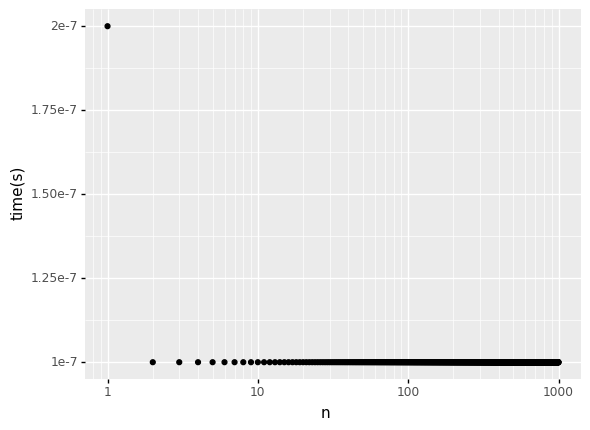

<ggplot: (142767126327)>

In [10]:
from functools import lru_cache

# call the decorator function
@lru_cache()
def f_lru(n):
    if n in (1,2):
       return 1
    return f_lru(n-1) + f_lru(n-2)

# run range of n from 1 to 1000
ns_1 = range(1,1000)
times = [time_it(f_lru,n) for n in tqdm(ns_1)]

(    
    p9.ggplot(pd.DataFrame({'n':ns_1, 'time(s)':times}), 
    p9.aes(x = "n", y = "time(s)")) +
    p9.geom_point() +
    p9.scale_x_log10(trans = 'log10') 
)

In [9]:
# get the cache info
r.cache_info()

CacheInfo(hits=3992, misses=999, maxsize=128, currsize=128)